In [1]:
%load_ext autoreload
%autoreload 2
#%matplotlib notebook
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bioAI.mplstyle')
from mpl_toolkits.axes_grid1 import make_axes_locatable

from methods import *

In [3]:
f = 1
orientation_offset = 0
center = np.zeros(2)

In [4]:
gridmodule = GridModule(center,orientation_offset,f, add=False)
gridmodule2 = GridModule(center,orientation_offset,f,non_negative=True)
phases = gridmodule.center[None]
gridmodule.init_module(phases)
gridmodule2.init_module(phases)
phases.shape

(1, 2)

In [5]:
nx,ny = 2,2 # board size

# initialize board
xx, yy = np.meshgrid(
    np.linspace(-nx/2, nx/2, 64),
    np.linspace(-ny/2, ny/2, 64),
)
board = np.stack([xx, yy], axis=-1)

In [6]:
ratemaps = gridmodule(board)
ratemaps.shape

(1, 64, 64, 3)

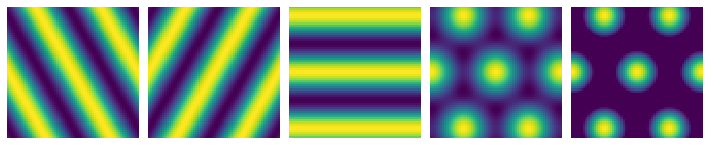

In [14]:
fig, axs = plt.subplots(ncols=5,figsize=(10,2,))

for i, ax in enumerate(axs[:-2]):
    ax.imshow(ratemaps[0,...,i])
    ax.axis('off')
axs[-2].imshow(np.sum(ratemaps[0],axis=-1))
axs[-2].axis('off')
axs[-1].imshow(gridmodule2(board)[0])
axs[-1].axis('off')
    
# three plane waves, their superposition with and without non_linearity
fig.savefig("results/superposition-waves.png",bbox_inches='tight')